In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
PATH = r"/home/usuario/Forex/Forecast Value.xlsx"

In [4]:
df = pd.read_excel(PATH)

In [5]:
df.head()

,Month/Year,Value,Country
0,2022-02-01,0.58,Colombia/Ecuador
1,2022-03-04,0.61,Colombia/Ecuador
2,2022-04-04,0.65,Colombia/Ecuador
3,2022-05-05,0.39,Colombia/Ecuador
4,2022-06-05,0.53,Colombia/Ecuador


In [6]:
df.tail()

,Month/Year,Value,Country
64,2023-08-06,0.70,Brasil
65,2023-09-06,0.73,Brasil
66,2023-10-07,0.75,Brasil
67,2023-11-07,0.75,Brasil
68,2023-12-08,0.74,Brasil


In [7]:
df["Month/Year"] = pd.to_datetime(df['Month/Year'], format = "%Y-%m-%d")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month/Year  69 non-null     datetime64[ns]
 1   Value       69 non-null     float64       
 2   Country     69 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.7+ KB


In [17]:
df = df.set_axis(df['Month/Year']).drop('Month/Year', axis=1)

In [18]:
df.head()

,Value,Country
Month/Year,,
2022-02-01,0.58,Colombia/Ecuador
2022-03-04,0.61,Colombia/Ecuador
2022-04-04,0.65,Colombia/Ecuador
2022-05-05,0.39,Colombia/Ecuador
2022-06-05,0.53,Colombia/Ecuador


## DataViz

In [32]:
df.nunique()

Value      29
Country     3
dtype: int64

In [20]:
df['Country'].value_counts().sort_values()

Country
Colombia/Ecuador    23
Peru                23
Brasil              23
Name: count, dtype: int64

In [35]:
df_grouped = df.groupby('Month/Year').sum().reset_index()

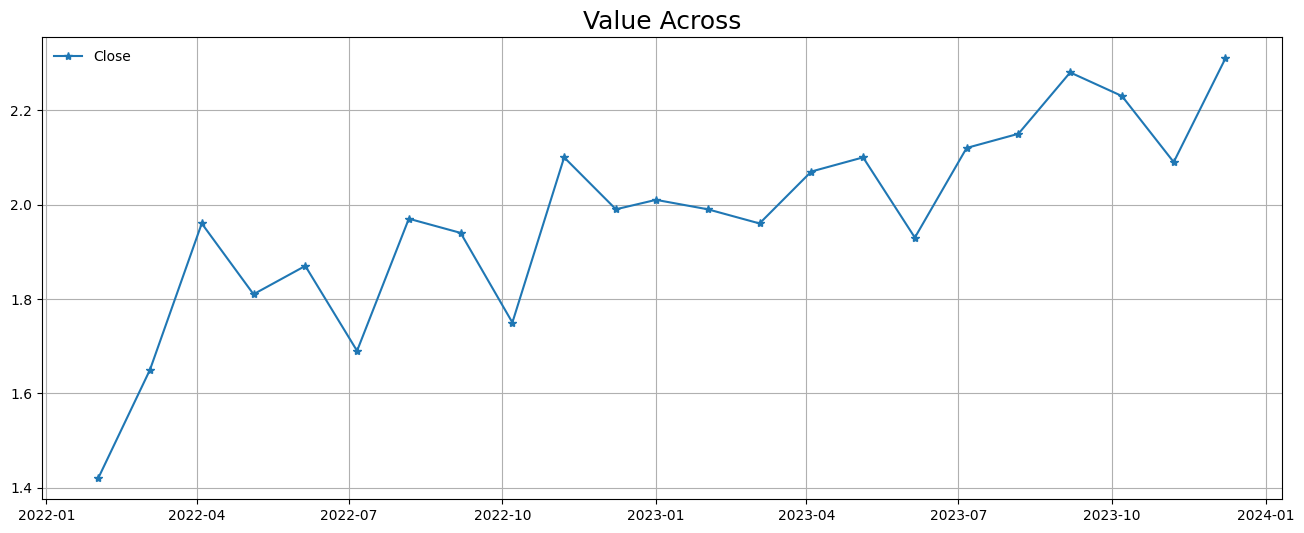

In [61]:
plt.figure(figsize=(16,6))
plt.plot(df_grouped['Month/Year'],df_grouped['Value'], label= "Close", marker = '*')
plt.title("Value Across", fontsize=18)
plt.legend(frameon=False) # loc='right', bbox_to_anchor=(0.5, 1.2), ncol=2
# sns.despine(trim=True, offset=5)
plt.grid(True)
plt.show()

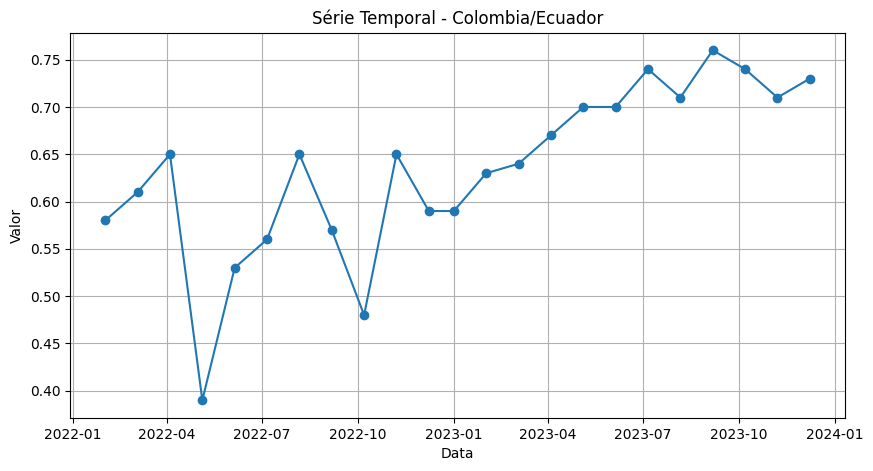

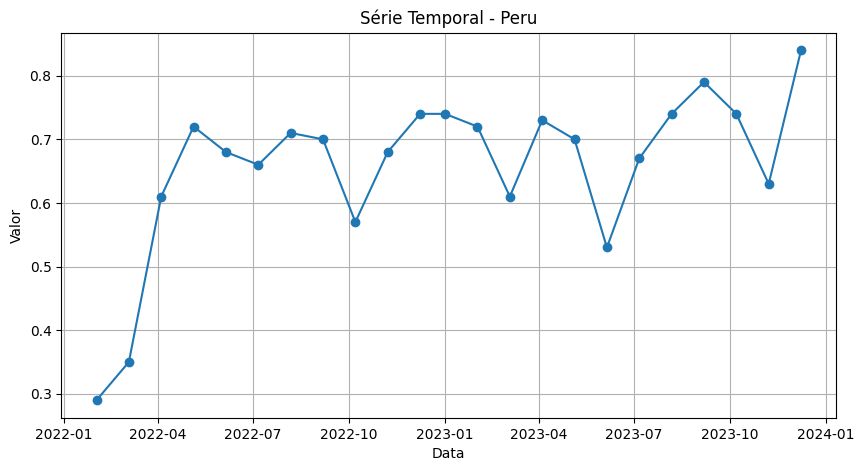

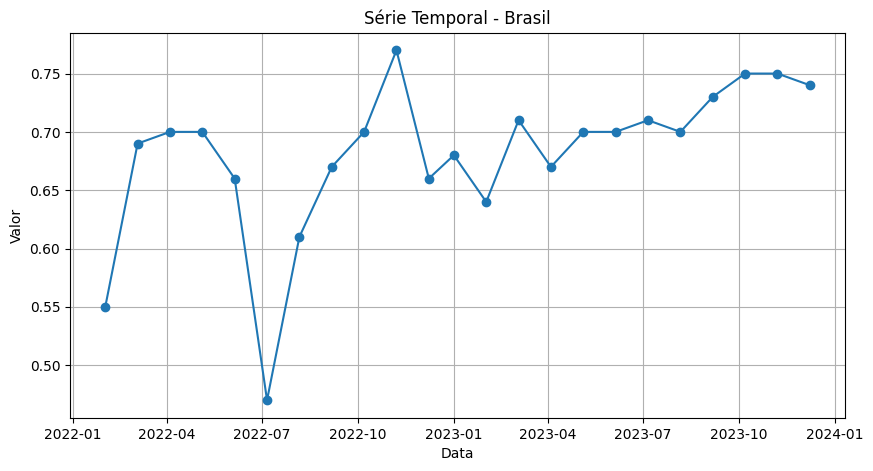

In [54]:
# Filtra e plota o gráfico para cada país
countries = df['Country'].unique()

for country in countries:
    df_country = df[df['Country'] == country]
    # print(df_country)
    plt.figure(figsize=(10, 5))
    plt.plot(df_country.index, df_country['Value'], marker='o')
    plt.title(f'Série Temporal - {country}')
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.grid(True)
    plt.show()

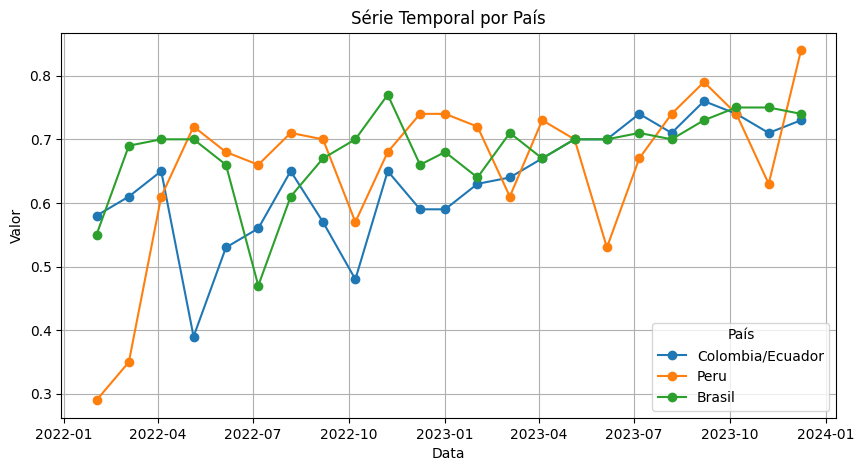

In [59]:
# Cria o gráfico combinado
plt.figure(figsize=(10, 5))

# Plota cada país no mesmo gráfico
for country in df['Country'].unique():
    df_country = df[df['Country'] == country]
    plt.plot(df_country.index, df_country['Value'], marker='o', label=country)

# Personaliza o gráfico
plt.title('Série Temporal por País')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend(title='País')
plt.grid(True)
plt.show()

# Series Temporais

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

2024-09-01 12:57:03.995277: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-01 12:57:04.001615: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-01 12:57:04.020786: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-01 12:57:04.049604: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-01 12:57:04.060150: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-01 12:57:04.083475: I tensorflow/core/platform/cpu_feature_gu

[TDS](https://towardsdatascience.com/a-quick-deep-learning-recipe-time-series-forecasting-with-keras-in-python-f759923ba64)

[Machine Learning Mastery](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)

[Geeks4Geeks](https://www.geeksforgeeks.org/time-series-forecasting-using-recurrent-neural-networks-rnn-in-tensorflow/)

[Kaggle](https://www.kaggle.com/code/onurderya/time-series-forecasting-with-ann-lstm)


[Manual TensorFlow](https://www.tensorflow.org/tutorials/structured_data/time_series?hl=pt-br#split_the_data)